In [20]:
import os
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

program_num = '1'
programs = {
    '1': {
        'filename': '04-03-2022_22-51.log',
        'functionname': 'crash_me'
    },
    '2': {
        'filename': '05-03-2022_11-50.log',
        'functionname': 'balanced_parantheses'
    },
    '3': {
        'filename': '',
        'functionname': ''
    },
}

filename = programs[program_num]['filename']
functionname = programs[program_num]['functionname']
filepath = os.path.join('sample_programs/'+ functionname, filename)
with open(filepath, 'r') as handler:
    data = json.load(handler)

In [21]:
X = []
Y = []

for entry in data:
    X.append([entry['x1'], entry['x2']])
    Y.append(entry['score'])
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

(196, 2) (196,)


In [22]:
import pandas as pd
pd.options.display.max_rows = 20
data_dict = {
            'x1': [entry['x1'] for entry in data] ,
            'x2': [entry['x2'] for entry in data],
            'y': [entry['score'] for entry in data]
        }
df = pd.DataFrame(data_dict)
  
# displaying the DataFrame
df

,x1,x2,y
0,1.0,1.0,0.250000
1,1.0,1.3,0.541667
2,1.0,1.6,0.250000
3,1.0,1.9,0.291667
4,1.0,2.2,0.291667
...,...,...,...
191,4.9,3.7,0.250000
192,4.9,4.0,0.520833
193,4.9,4.3,0.250000
194,4.9,4.6,0.354167


<IPython.core.display.Javascript object>


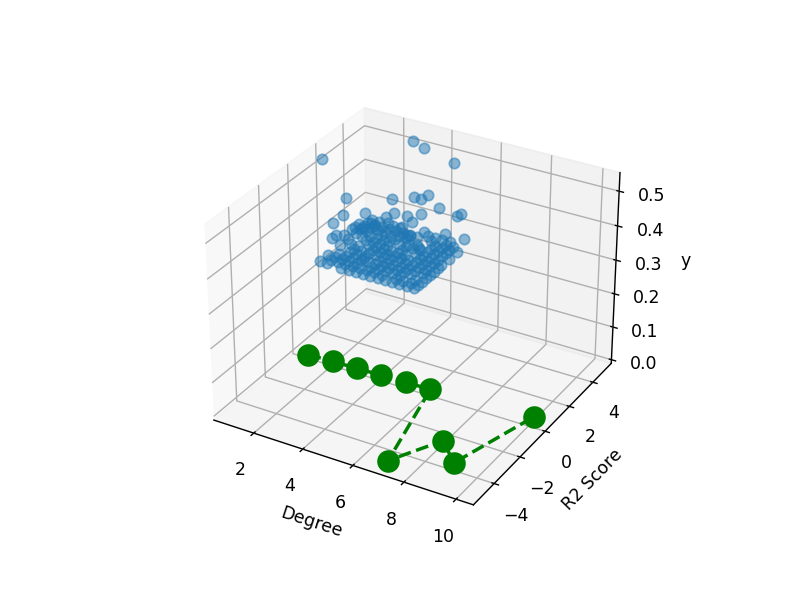

In [23]:
def plot_points(X, y):
    ax = plt.axes(projection='3d')
    ax.plot(X[:,0], X[:, 1], y, zorder=15, linestyle='none', marker='o', alpha=0.5)
    
    ax.set_title("Score distribution")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    plt.show()
plot_points(X, Y)

# Linear Regression

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
y = Y
model = lin_reg.fit(X, y)

In [ ]:
model.score(X,Y)

# Polynomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

max_degree = 10
r2_scores = []
models = []
for degree in range(1, max_degree + 1):
    y = Y
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    model_poly = pol_reg.fit(X_poly, y)
    r2_scores.append(model_poly.score(X_poly, y))
    models.append(model_poly)

In [44]:
def viz_linear():
    X = list(range(1, max_degree + 1))
    y = r2_scores
    plt.plot(X, y, 'ro-', linewidth=2, markersize=12)
#     plt.scatter(X, y, color='red')
#     plt.plot(X, y, color='blue')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('R2 Score')
    plt.show()
    return

<IPython.core.display.Javascript object>


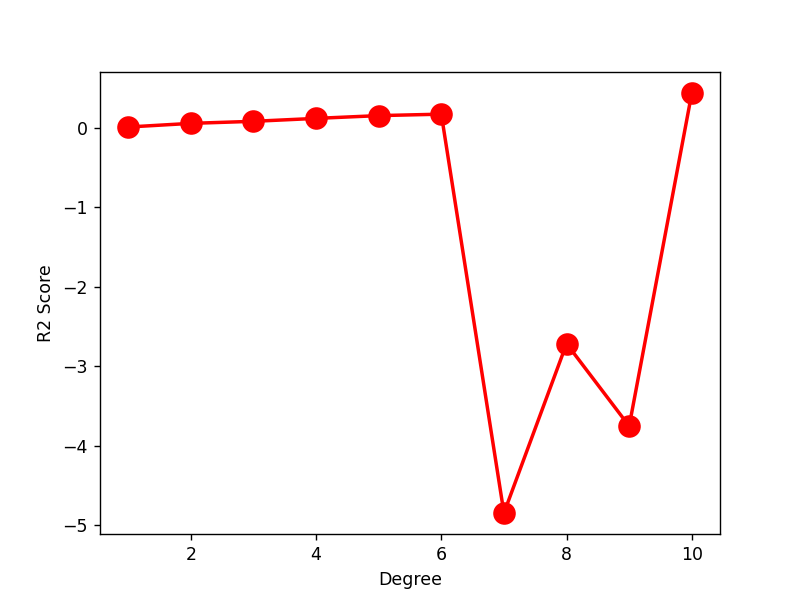

In [45]:
viz_linear()

# Predictions


In [18]:
def plot_predictions(X, y, model, lower_limit, upper_limit, size):
    ax = plt.axes(projection='3d')

    x_pred = np.linspace(lower_limit, upper_limit, size)   # range of porosity values
    y_pred = np.linspace(lower_limit, upper_limit, size)  # range of brittleness values
    xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
    model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
    predicted = model_poly.predict(poly_reg.fit_transform(model_viz))

    ax.plot(X[:,0], X[:, 1], y, zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot_surface(xx_pred, yy_pred, predicted.reshape(size, size), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    
    ax.set_title("Score distribution")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    plt.show()


<IPython.core.display.Javascript object>


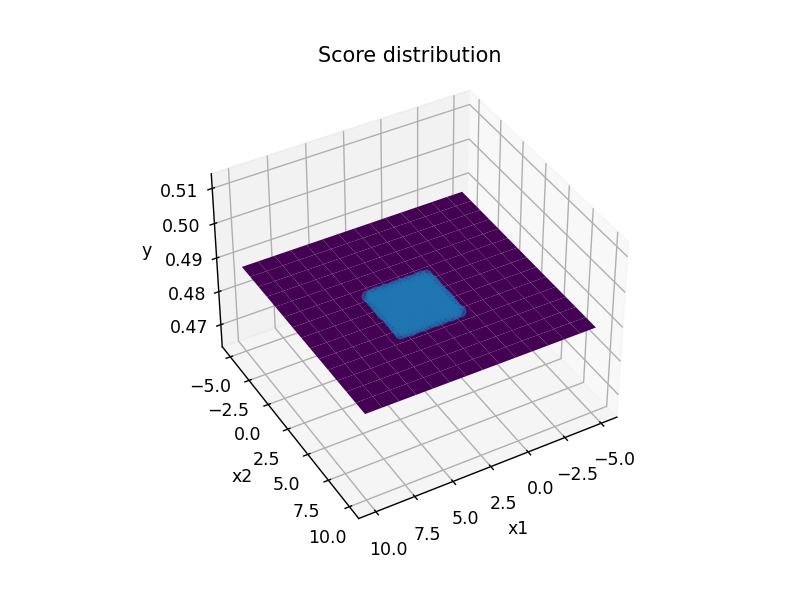

In [19]:
plot_predictions(X, Y, model_poly, -5, 10, 15)